1. Using Lasso regression on Boston house prices,select the best feature that mostly influences the output (price of the house)

In [1]:
# feature selection using lasso Regression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [16]:
from sklearn.linear_model import Lasso

In [3]:
# load the dataset 
boston = pd.read_csv('/Users/hackthebox/Downloads/Machine-Learning-Self-Study/Regression/Lasso_Regression/Data/boston_houses.csv')
boston.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
# see the names of columns
names = boston.columns
names

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'BLACK', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
# to rename the column and drop the column
boston.rename({'Unnamed: 0':'a'}, axis='columns',inplace=True)

In [10]:
# drop the column
boston.drop(['a'], axis=1, inplace=True)

In [11]:
# drop MEDV column and take remainig columns as x
x = boston.drop('MEDV', axis=1)

In [12]:
# take MEDV column to y
y = boston['MEDV'].values

In [14]:
# take the names of oth to 13th columns
names = x.columns
names

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'BLACK', 'LSTAT'],
      dtype='object')

In [15]:
# range of columns,the gives 0 to 13
rng = range(len(names))
rng

range(0, 13)

In [20]:
# apply the lasso regression on the data
# after the model is trained , find the co-efficients
# train the model,we have ti call fit() method on the data.
ls = Lasso(alpha=0.1)
data= ls.fit(x,y)
cf = data.coef_
print(cf)

[-0.09789363  0.04921111 -0.03661906  0.95519003 -0.          3.70320175
 -0.01003698 -1.16053834  0.27470721 -0.01457017 -0.77065434  0.01024917
 -0.56876914]


- highest value 3.70320175 among all other co-efficients.5th column s nothing but 'RM' column that represents the Number of rooms in the house.
- If we draw a line plot between the Column number (0th to 12th columns) and the co-efficients,we can observe the peak at 5th column.

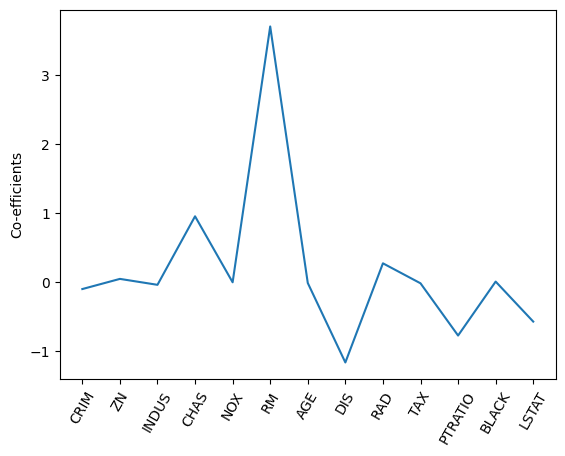

In [21]:
# draw line plot between the column numbers and co-efficients
plt.plot(rng,cf)
plt.xticks(rng,names,rotation=60)
plt.ylabel('Co-efficients')
plt.show()

In [24]:
# finds the accuracy of the model
ls.score(x,y)

0.7269834862602695

In [25]:
# find the price (MEDV) of the house when the following data is given.
# ['CRIM'=0.02731, 'ZN'=0, 'INDUS'=7.07, 'CHAS'=0, 'NOX'=0.46, 'RM'=6.421, 'AGE'=78.9, 'DIS'=4.9671, 'RAD'=2, 'TAX'=242,'PTRATIO'=17.8, 'BLACK'=396.6, 'LSTAT'=9.14]
newdata = [[0.02731, 0, 7.07, 0, 0.46, 6.421, 78.9, 4.9671, 2, 242,17.8,396.6, 9.14]]
price = ls.predict(newdata)
print(price)


[24.70939334]
